In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
covid19_df=pd.read_csv("covid_19_india.csv")

In [3]:
covid19_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [1]:
covid19_df.tail()

NameError: name 'covid19_df' is not defined

In [5]:
covid19_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [6]:
covid19_df.describe()


,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [7]:
covid19_df['Date']=pd.to_datetime(covid19_df['Date'], format = '%Y-%m-%d')

In [8]:
covid19_df.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True,axis=1)

In [9]:
covid19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18110 non-null  datetime64[ns]
 1   State/UnionTerritory  18110 non-null  object        
 2   Cured                 18110 non-null  int64         
 3   Deaths                18110 non-null  int64         
 4   Confirmed             18110 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 707.5+ KB


In [10]:
covid19_df.describe()


,Cured,Deaths,Confirmed
count,1.811000e+04,18110.000000,1.811000e+04
mean,2.786375e+05,4052.402264,3.010314e+05
std,6.148909e+05,10919.076411,6.561489e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.360250e+03,32.000000,4.376750e+03
50%,3.336400e+04,588.000000,3.977350e+04
75%,2.788698e+05,3643.750000,3.001498e+05
max,6.159676e+06,134201.000000,6.363442e+06


In [11]:
covid19_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [12]:
  covid19_df['Active Cases'] = covid19_df['Confirmed'] - (  covid19_df['Cured'] + covid19_df['Deaths'])

In [13]:
covid19_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [14]:
Areawise=pd.pivot_table(covid19_df,values=['Cured','Deaths','Confirmed'],index='State/UnionTerritory',aggfunc=max)

In [15]:
Areawise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544


In [16]:
Areawise['Recovery Rate']=Areawise['Cured']*100/Areawise['Confirmed']

In [17]:
Areawise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Andaman and Nicobar Islands to West Bengal
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Confirmed      46 non-null     int64  
 1   Cured          46 non-null     int64  
 2   Deaths         46 non-null     int64  
 3   Recovery Rate  46 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.8+ KB


In [18]:
Areawise['Death Rate']=Areawise['Deaths']*100/Areawise['Confirmed']

In [21]:
Areawise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Andaman and Nicobar Islands to West Bengal
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Confirmed      46 non-null     int64  
 1   Cured          46 non-null     int64  
 2   Deaths         46 non-null     int64  
 3   Recovery Rate  46 non-null     float64
 4   Death Rate     46 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 2.2+ KB


In [22]:
Areawise

,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971
Bihar****,715730,701234,9452,97.974655,1.320610
Cases being reassigned to states,9265,0,0,0.000000,0.000000
Chandigarh,61992,61150,811,98.641760,1.308233
Chhattisgarh,1003356,988189,13544,98.488373,1.349870


In [23]:
Areawise=Areawise.sort_values(by='Confirmed',ascending=False)

In [24]:
Areawise

,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [25]:
vaccine=pd.read_csv("covid_vaccine_statewise.csv")
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [26]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [27]:
vaccine.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [58]:
vaccine.isnull().sum()

vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinated)    7685
Total Individuals Vaccinated           1926
dtype: int64

In [28]:
vaccine.rename(columns={'Updated On':'vaccine_Date'},inplace=True)

In [29]:

vaccine['vaccine_Date'] = pd.to_datetime(vaccine['vaccine_Date'], format='%d/%m/%Y')


In [30]:
vaccine=vaccine.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'])

In [31]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   vaccine_Date                         7845 non-null   datetime64[ns]
 1   State                                7845 non-null   object        
 2   Total Doses Administered             7621 non-null   float64       
 3   Sessions                             7621 non-null   float64       
 4    Sites                               7621 non-null   float64       
 5   First Dose Administered              7621 non-null   float64       
 6   Second Dose Administered             7621 non-null   float64       
 7   Male (Doses Administered)            7461 non-null   float64       
 8   Female (Doses Administered)          7461 non-null   float64       
 9   Transgender (Doses Administered)     7461 non-null   float64       
 10   Covaxin (Do

In [32]:
vaccine.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [34]:
vaccine.head()

,vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [62]:
vaccine_state.rename(columns = {"Total Individuals Vaccinated":'Total'},inplace=True)
vaccine_state

C:\Users\jasthivenkatesh\AppData\Local\Temp\ipykernel_8744\2029084440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_state.rename(columns = {"Total Individuals Vaccinated":'Total'},inplace=True)


,vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,2021-08-11,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,2021-08-12,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,2021-08-13,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,2021-08-14,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
vaccine_state=vaccine[vaccine.State!='India']
vaccine_state.head()

,vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


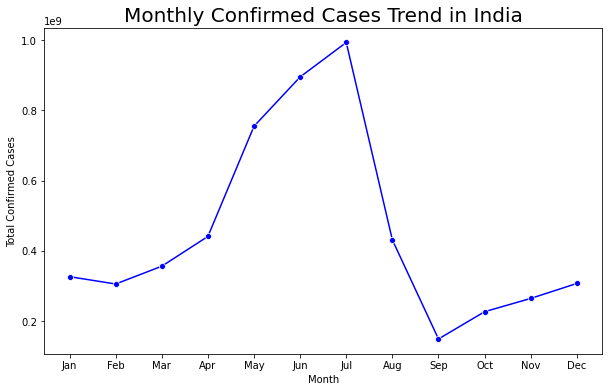

In [37]:
covid19_df['Month'] = covid19_df['Date'].dt.month

monthly_confirmed = covid19_df.groupby('Month')['Confirmed'].sum()

fig = plt.figure(figsize=(10, 6))
plt.title('Monthly Confirmed Cases Trend in India', size=20)
ax = sns.lineplot(x=monthly_confirmed.index, y=monthly_confirmed.values, marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Confirmed Cases')
plt.xticks(ticks=monthly_confirmed.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


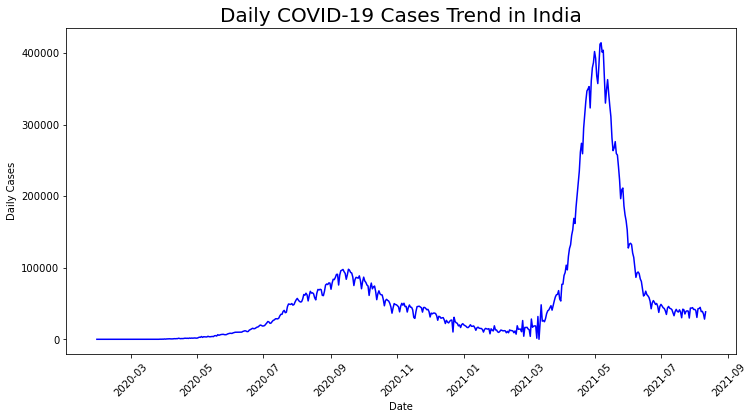

In [38]:
daily_cases = covid19_df.groupby('Date')['Confirmed'].sum().diff().fillna(0)

fig = plt.figure(figsize=(12, 6))
plt.title('Daily COVID-19 Cases Trend in India', size=20)
ax = sns.lineplot(data=daily_cases, x=daily_cases.index, y=daily_cases.values, color='blue')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.xticks(rotation=45)
plt.show()


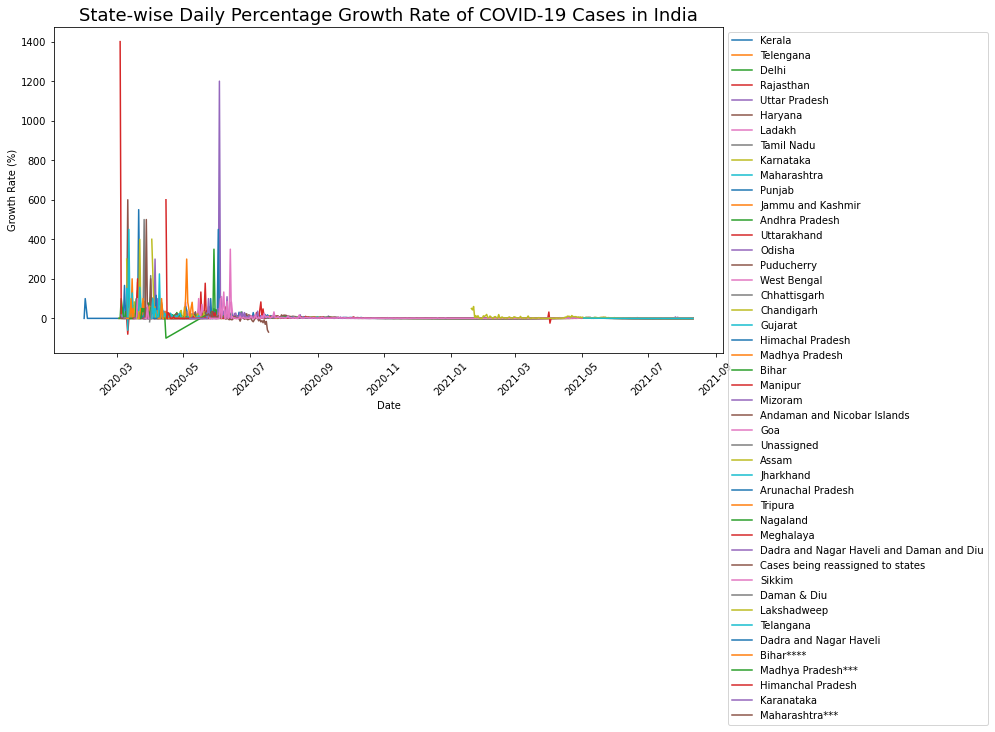

In [39]:
covid19_df['Growth Rate'] = covid19_df.groupby('State/UnionTerritory')['Confirmed'].pct_change() * 100

fig = plt.figure(figsize=(12, 6))
plt.title('State-wise Daily Percentage Growth Rate of COVID-19 Cases in India', size=18)
sns.lineplot(data=covid19_df, x='Date', y='Growth Rate', hue='State/UnionTerritory', palette='tab10')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


C:\Users\jasthivenkatesh\AppData\Local\Temp\ipykernel_8744\3284822119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Growth Rate'] = state_data['Confirmed'].pct_change() * 100


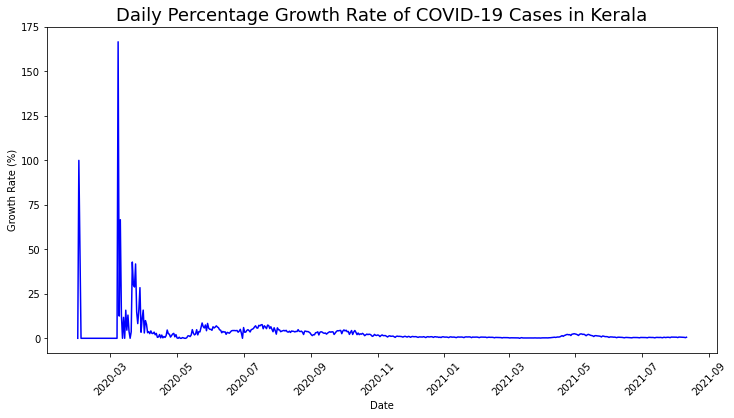

In [40]:
selected_state = 'Kerala'

state_data = covid19_df[covid19_df['State/UnionTerritory'] == selected_state]

state_data['Growth Rate'] = state_data['Confirmed'].pct_change() * 100

fig = plt.figure(figsize=(12, 6))
plt.title(f'Daily Percentage Growth Rate of COVID-19 Cases in {selected_state}', size=18)
sns.lineplot(data=state_data, x='Date', y='Growth Rate', color='blue')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.show()


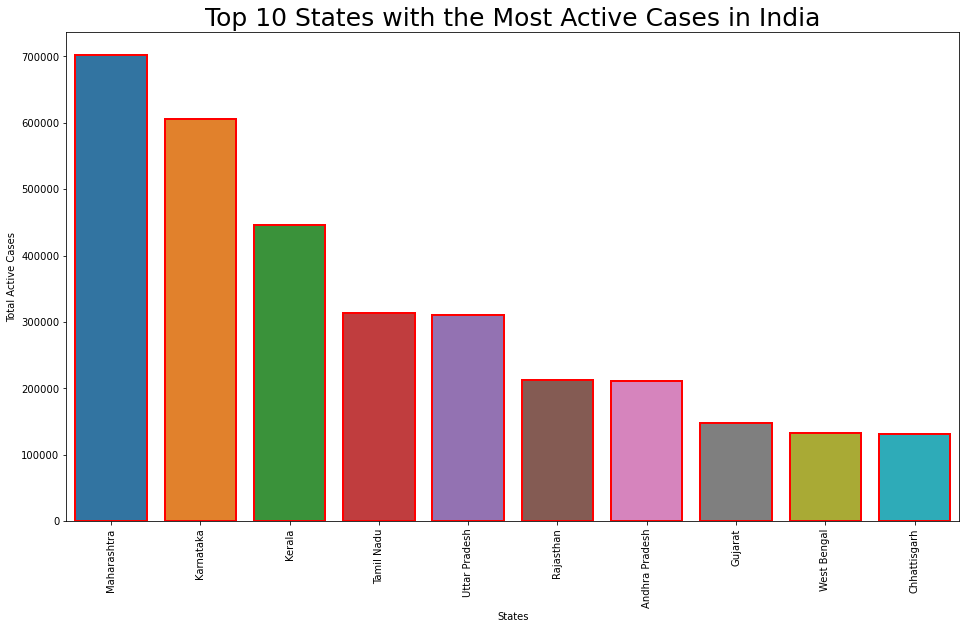

In [42]:


top10_activecases = covid19_df.groupby('State/UnionTerritory').max()[['Active Cases', 'Date']].sort_values(by='Active Cases', ascending=False).reset_index()


fig = plt.figure(figsize=(16,9))
plt.title('Top 10 States with the Most Active Cases in India', size=25)
ax = sns.barplot(data=top10_activecases.iloc[:10], y='Active Cases', x='State/UnionTerritory', linewidth=2, edgecolor='red')
plt.xlabel('States')
plt.ylabel('Total Active Cases')
plt.xticks(rotation=90)  
plt.show()


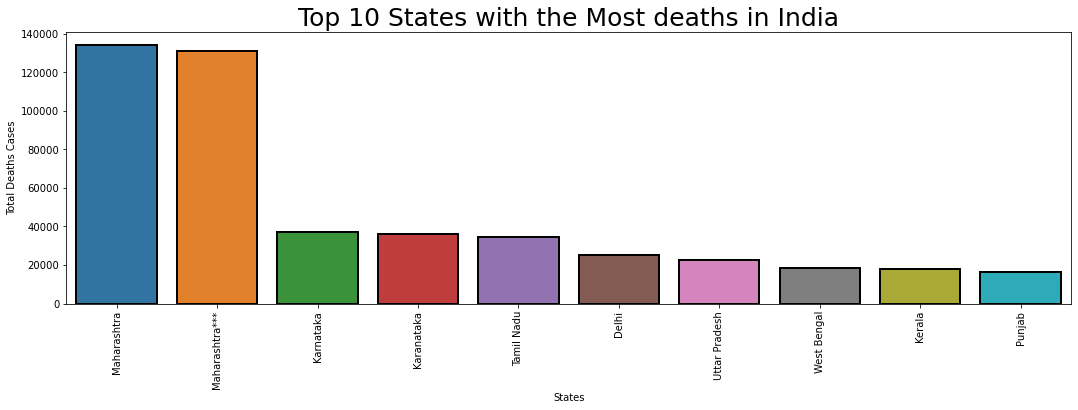

In [43]:
top10_deaths = covid19_df.groupby('State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by='Deaths', ascending=False).reset_index()


fig = plt.figure(figsize=(18,5))
plt.title('Top 10 States with the Most deaths in India', size=25)
ax = sns.barplot(data=top10_deaths.iloc[:10], y='Deaths', x='State/UnionTerritory', linewidth=2, edgecolor='black')
plt.xlabel('States')
plt.ylabel('Total Deaths Cases')
plt.xticks(rotation=90)  
plt.show()

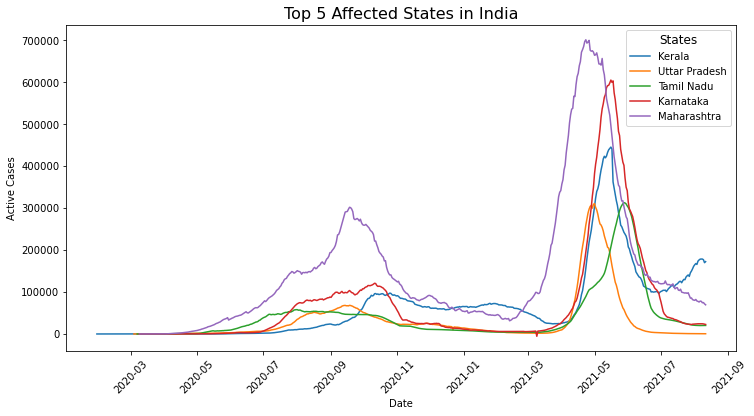

In [44]:

top_affected_states = ['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh']
filtered_df = covid19_df[covid19_df['State/UnionTerritory'].isin(top_affected_states)]

fig = plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=filtered_df, x='Date', y='Active Cases', hue='State/UnionTerritory')
ax.set_title('Top 5 Affected States in India', size=16)
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.xticks(rotation=45)  
plt.legend(title='States', title_fontsize='12')
plt.show()


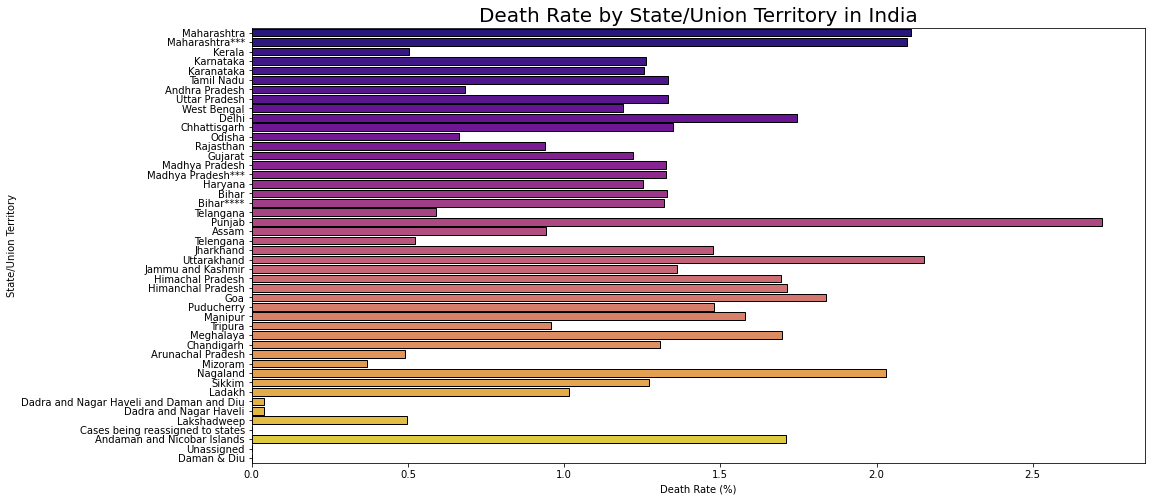

In [45]:
fig = plt.figure(figsize=(16, 8))
plt.title('Death Rate by State/Union Territory in India', size=20)
ax = sns.barplot(data=Areawise, x='Death Rate', y=Areawise.index, palette='plasma', edgecolor='black')
plt.xlabel('Death Rate (%)')
plt.ylabel('State/Union Territory')
plt.show()

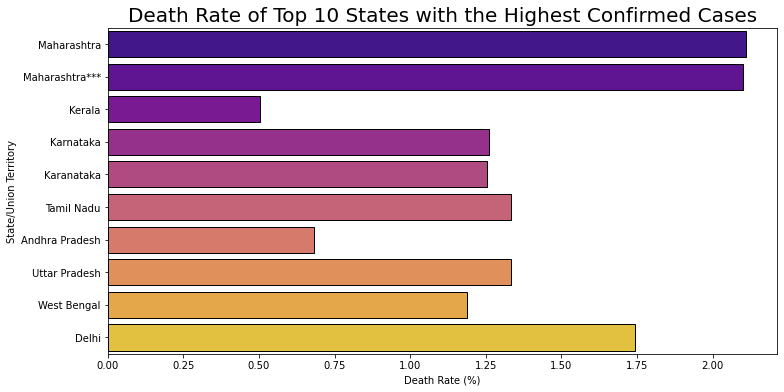

In [49]:
top_10_states = Areawise.head(10).index

top_10_states_data = Areawise.loc[top_10_states, ['Recovery Rate', 'Death Rate']]

fig = plt.figure(figsize=(12, 6))
plt.title('Death Rate of Top 10 States with the Highest Confirmed Cases', size=20)
ax = sns.barplot(data=top_10_states_data, x='Death Rate', y=top_10_states_data.index, palette='plasma', edgecolor='black')
plt.xlabel('Death Rate (%)')
plt.ylabel('State/Union Territory')
plt.show()

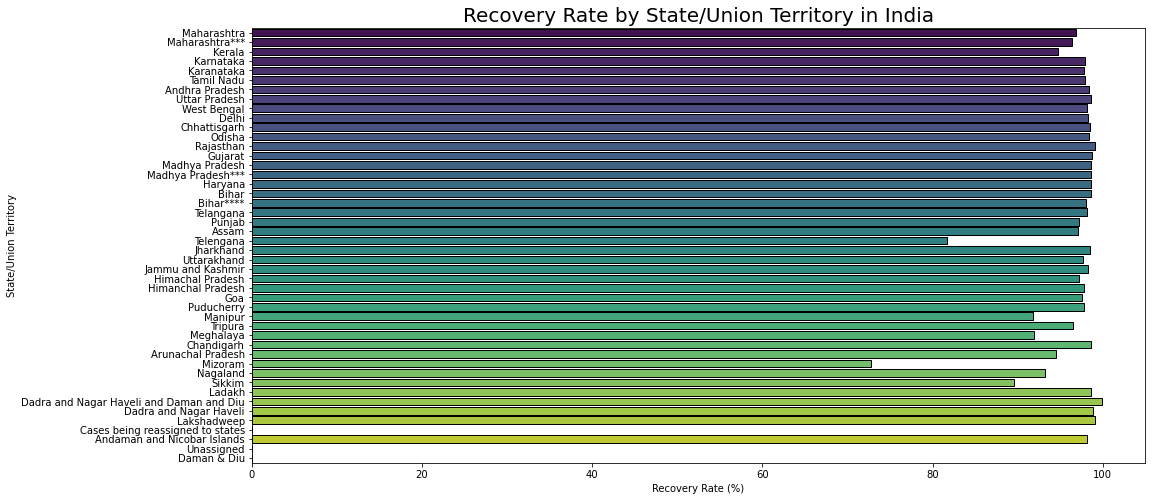

In [50]:
fig = plt.figure(figsize=(16, 8))
plt.title('Recovery Rate by State/Union Territory in India', size=20)
ax = sns.barplot(data=Areawise, x='Recovery Rate', y=Areawise.index, palette='viridis', edgecolor='black')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('State/Union Territory')
plt.show()



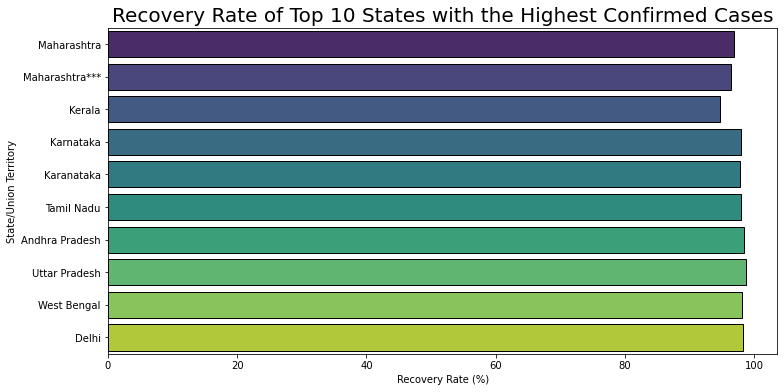

In [51]:


fig = plt.figure(figsize=(12, 6))
plt.title('Recovery Rate of Top 10 States with the Highest Confirmed Cases', size=20)
ax = sns.barplot(data=top_10_states_data, x='Recovery Rate', y=top_10_states_data.index, palette='viridis', edgecolor='black')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('State/Union Territory')
plt.show()



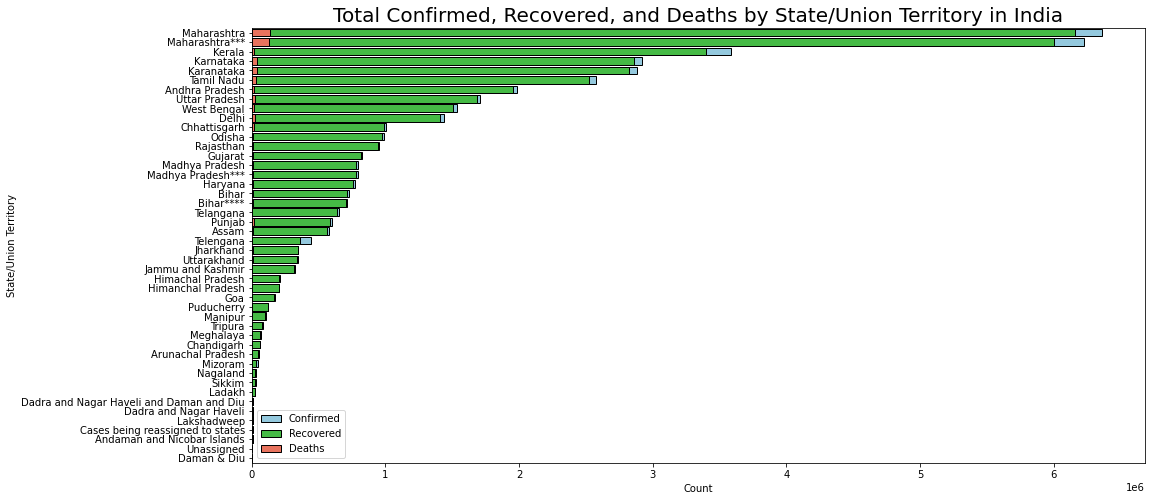

In [52]:
fig = plt.figure(figsize=(16, 8))
plt.title('Total Confirmed, Recovered, and Deaths by State/Union Territory in India', size=20)
ax = sns.barplot(data=Areawise, x='Confirmed', y=Areawise.index, label='Confirmed', color='skyblue', edgecolor='black')
ax = sns.barplot(data=Areawise, x='Cured', y=Areawise.index, label='Recovered', color='limegreen', edgecolor='black')
ax = sns.barplot(data=Areawise, x='Deaths', y=Areawise.index, label='Deaths', color='tomato', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('State/Union Territory')
plt.legend()
plt.show()


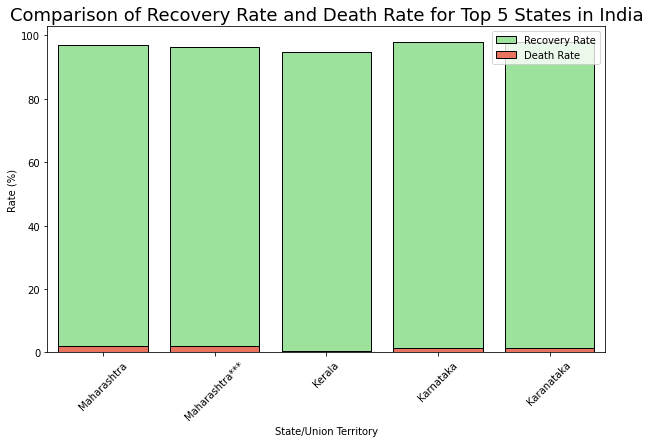

In [54]:
top_5_states = Areawise.head(5).index

top_5_states_data = Areawise.loc[top_5_states, ['Recovery Rate', 'Death Rate']]

fig = plt.figure(figsize=(10, 6))
plt.title('Comparison of Recovery Rate and Death Rate for Top 5 States in India', size=18)
ax = sns.barplot(data=top_5_states_data, x=top_5_states_data.index, y='Recovery Rate', label='Recovery Rate', color='lightgreen', edgecolor='black')
ax = sns.barplot(data=top_5_states_data, x=top_5_states_data.index, y='Death Rate', label='Death Rate', color='tomato', edgecolor='black')
plt.xlabel('State/Union Territory')
plt.ylabel('Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


C:\Users\jasthivenkatesh\AppData\Local\Temp\ipykernel_8744\2135167242.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Daily New Cases'] = state_data['Confirmed'].diff().fillna(0)
C:\Users\jasthivenkatesh\AppData\Local\Temp\ipykernel_8744\2135167242.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Daily New Deaths'] = state_data['Deaths'].diff().fillna(0)


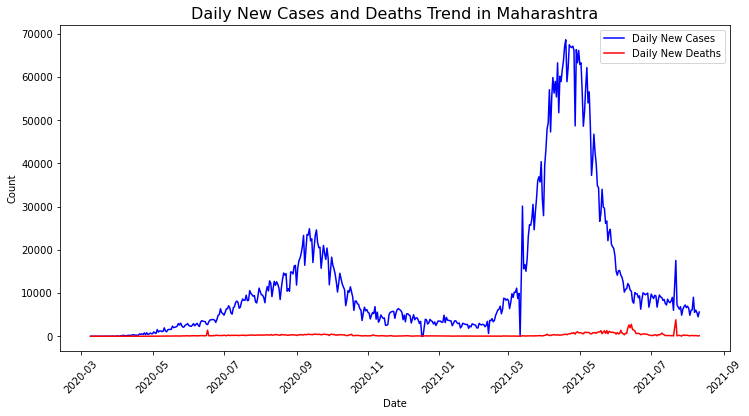

In [53]:
selected_state = 'Maharashtra'

state_data = covid19_df[covid19_df['State/UnionTerritory'] == selected_state]

state_data['Daily New Cases'] = state_data['Confirmed'].diff().fillna(0)
state_data['Daily New Deaths'] = state_data['Deaths'].diff().fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(state_data['Date'], state_data['Daily New Cases'], color='blue', label='Daily New Cases')
ax.plot(state_data['Date'], state_data['Daily New Deaths'], color='red', label='Daily New Deaths')
plt.title(f'Daily New Cases and Deaths Trend in {selected_state}', size=16)
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()


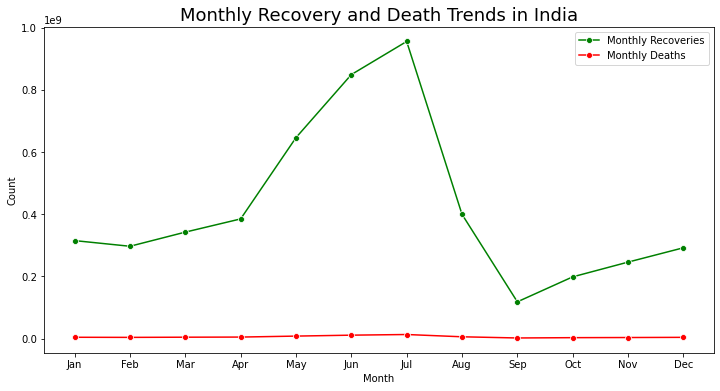

In [55]:
monthly_recovery = covid19_df.groupby('Month')['Cured'].sum()
monthly_deaths = covid19_df.groupby('Month')['Deaths'].sum()

fig = plt.figure(figsize=(12, 6))
plt.title('Monthly Recovery and Death Trends in India', size=18)
ax = sns.lineplot(x=monthly_recovery.index, y=monthly_recovery.values, marker='o', color='green', label='Monthly Recoveries')
ax = sns.lineplot(x=monthly_deaths.index, y=monthly_deaths.values, marker='o', color='red', label='Monthly Deaths')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=monthly_recovery.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()


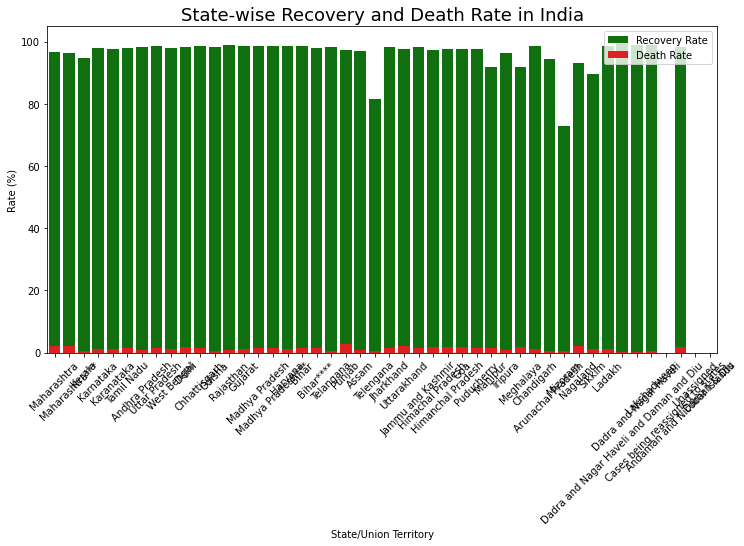

In [57]:
fig = plt.figure(figsize=(12, 6))
plt.title('State-wise Recovery and Death Rate in India', size=18)
sns.barplot(data=Areawise.reset_index(), x=Areawise.index, y='Recovery Rate', color='green', label='Recovery Rate')
sns.barplot(data=Areawise.reset_index(), x=Areawise.index, y='Death Rate', color='red', label='Death Rate')
plt.xlabel('State/Union Territory')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


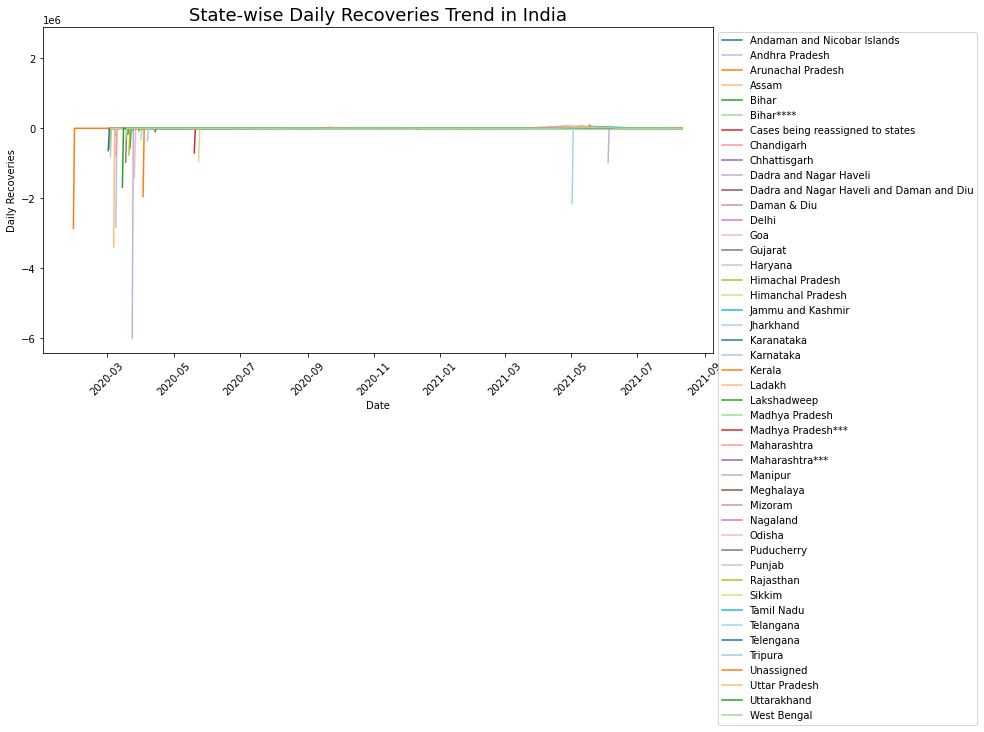

In [56]:
daily_recoveries = covid19_df.groupby(['State/UnionTerritory', 'Date'])['Cured'].sum().diff().fillna(0)

fig = plt.figure(figsize=(12, 6))
plt.title('State-wise Daily Recoveries Trend in India', size=18)
sns.lineplot(data=daily_recoveries.reset_index(), x='Date', y='Cured', hue='State/UnionTerritory', palette='tab20')
plt.xlabel('Date')
plt.ylabel('Daily Recoveries')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


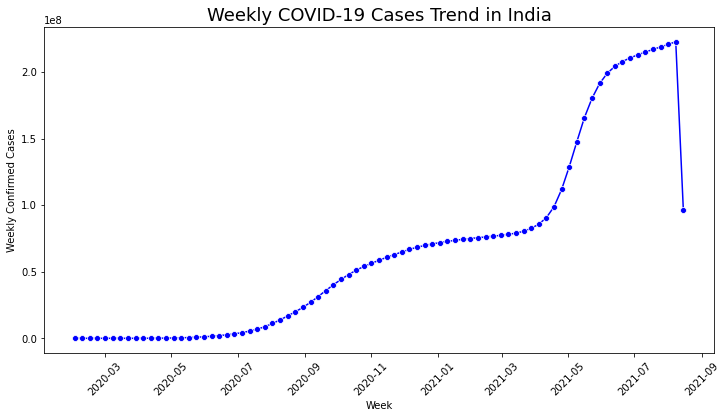

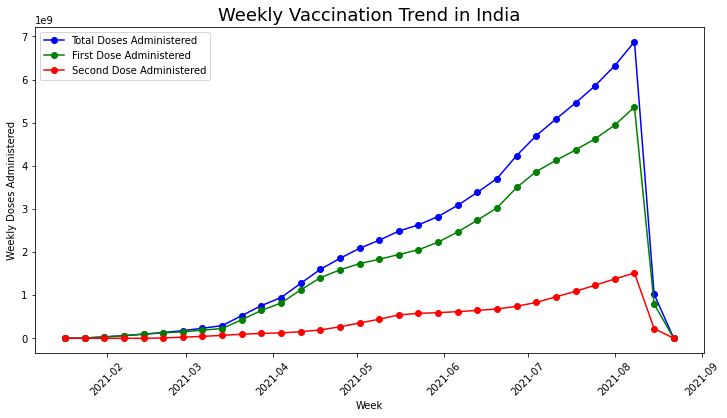

In [59]:
covid19_weekly = covid19_df.resample('W', on='Date').sum()
vaccine_weekly = vaccine.resample('W', on='vaccine_Date').sum()

fig = plt.figure(figsize=(12, 6))
plt.title('Weekly COVID-19 Cases Trend in India', size=18)
sns.lineplot(data=covid19_weekly['Confirmed'], marker='o', color='blue')
plt.xlabel('Week')
plt.ylabel('Weekly Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

fig = plt.figure(figsize=(12, 6))
plt.title('Weekly Vaccination Trend in India', size=18)
plt.plot(vaccine_weekly.index, vaccine_weekly['Total Doses Administered'], label='Total Doses Administered', marker='o', color='blue')
plt.plot(vaccine_weekly.index, vaccine_weekly['First Dose Administered'], label='First Dose Administered', marker='o', color='green')
plt.plot(vaccine_weekly.index, vaccine_weekly['Second Dose Administered'], label='Second Dose Administered', marker='o', color='red')
plt.xlabel('Week')
plt.ylabel('Weekly Doses Administered')
plt.xticks(rotation=45)
plt.legend()
plt.show()


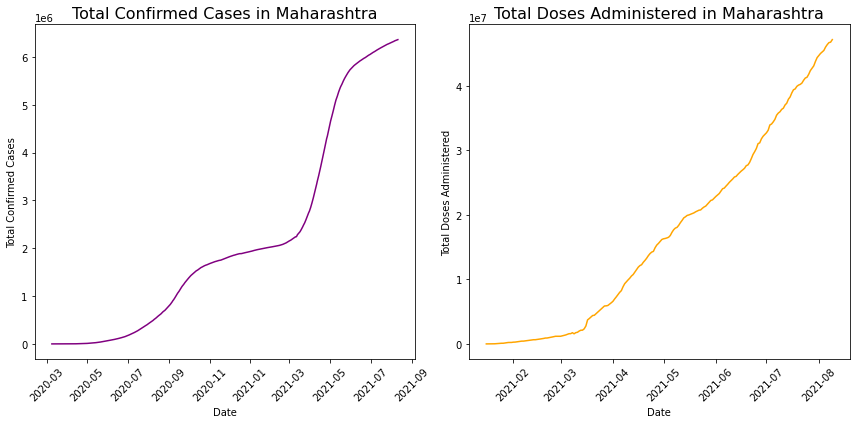

In [60]:
selected_state = 'Maharashtra'
state_data = covid19_df[covid19_df['State/UnionTerritory'] == selected_state]
state_vaccination_data = vaccine[vaccine['State'] == selected_state]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(state_data['Date'], state_data['Confirmed'], color='purple')
plt.title(f'Total Confirmed Cases in {selected_state}', size=16)
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(state_vaccination_data['vaccine_Date'], state_vaccination_data['Total Doses Administered'], color='orange')
plt.title(f'Total Doses Administered in {selected_state}', size=16)
plt.xlabel('Date')
plt.ylabel('Total Doses Administered')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


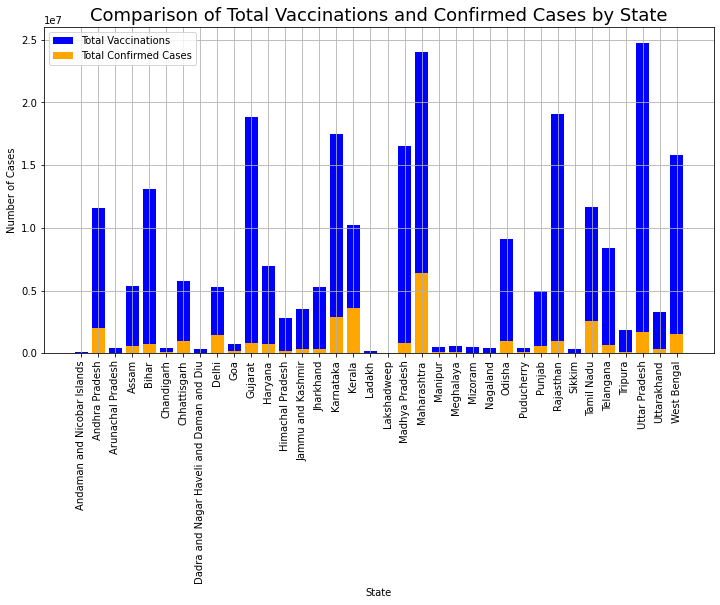

In [65]:
statewise_vaccination_cases = pd.merge(vaccine.groupby('State')['Total Individuals Vaccinated'].max().reset_index(), 
                                      covid19_df.groupby('State/UnionTerritory')['Confirmed'].max().reset_index(),
                                      left_on='State', right_on='State/UnionTerritory')

plt.figure(figsize=(12, 6))
plt.bar(statewise_vaccination_cases['State'], statewise_vaccination_cases['Total Individuals Vaccinated'], label='Total Vaccinations', color='blue')
plt.bar(statewise_vaccination_cases['State'], statewise_vaccination_cases['Confirmed'], label='Total Confirmed Cases', color='orange')
plt.title('Comparison of Total Vaccinations and Confirmed Cases by State', size=18)
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [66]:
#most vaccinated state 
max_vac=vaccine_state.groupby('State')['Total'].sum().to_frame('Total')
max_vac=max_vac.sort_values('Total',ascending=False)[:5]
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


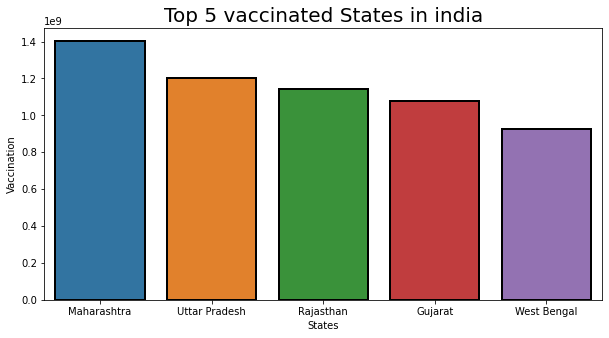

In [67]:
fig=plt.figure(figsize=(10,5))
plt.title('Top 5 vaccinated States in india',size=20)
x=sns.barplot(data=max_vac.iloc[:10],y=max_vac.Total,x=max_vac.index,linewidth=2,edgecolor='black')
plt.xlabel("States")
plt.ylabel("Vaccination")
plt.show()

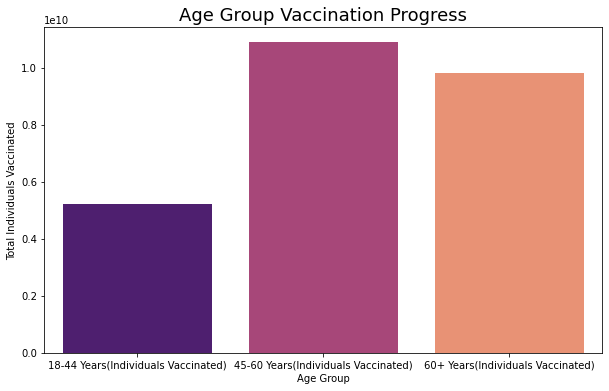

In [68]:
age_group_vaccinated = vaccine[['18-44 Years(Individuals Vaccinated)', '45-60 Years(Individuals Vaccinated)', '60+ Years(Individuals Vaccinated)']].sum()

fig = plt.figure(figsize=(10, 6))
plt.title('Age Group Vaccination Progress', size=18)
sns.barplot(x=age_group_vaccinated.index, y=age_group_vaccinated.values, palette='magma')
plt.xlabel('Age Group')
plt.ylabel('Total Individuals Vaccinated')
plt.show()


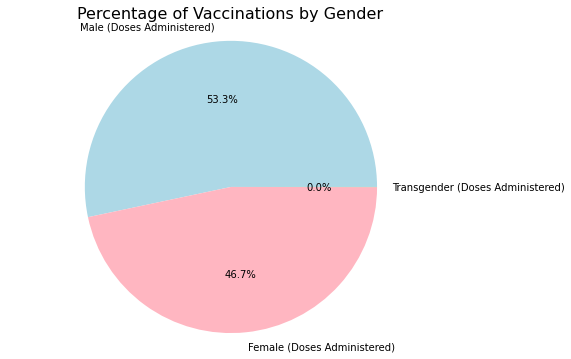

In [69]:
gender_cols = ['Male (Doses Administered)', 'Female (Doses Administered)', 'Transgender (Doses Administered)']
total_vaccinations_by_gender = vaccine[gender_cols].sum()

plt.figure(figsize=(8, 6))
plt.pie(total_vaccinations_by_gender, labels=gender_cols, colors=['lightblue', 'lightpink', 'lightgreen'], autopct='%1.1f%%')
plt.title('Percentage of Vaccinations by Gender', size=16)
plt.axis('equal')
plt.show()


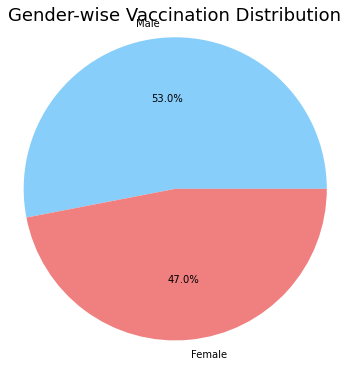

In [70]:
total_male_vaccinated = vaccine['Male(Individuals Vaccinated)'].sum()
total_female_vaccinated = vaccine['Female(Individuals Vaccinated)'].sum()

fig = plt.figure(figsize=(6, 6))
plt.title('Gender-wise Vaccination Distribution', size=18)
plt.pie([total_male_vaccinated, total_female_vaccinated], labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightskyblue', 'lightcoral'])
plt.axis('equal')
plt.show()


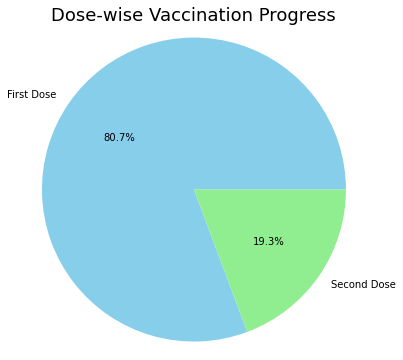

In [71]:
first_doses = vaccine['First Dose Administered'].sum()
second_doses = vaccine['Second Dose Administered'].sum()

fig = plt.figure(figsize=(6, 6))
plt.title('Dose-wise Vaccination Progress', size=18)
plt.pie([first_doses, second_doses], labels=['First Dose', 'Second Dose'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.axis('equal')
plt.show()


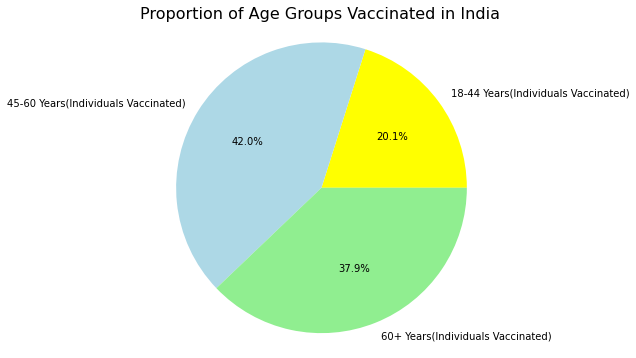

In [73]:
age_group_vaccinations = vaccine[['18-44 Years(Individuals Vaccinated)', '45-60 Years(Individuals Vaccinated)', '60+ Years(Individuals Vaccinated)']].sum()

plt.figure(figsize=(8, 6))
plt.pie(age_group_vaccinations, labels=age_group_vaccinations.index, colors=['yellow', 'lightblue', 'lightgreen'], autopct='%1.1f%%')
plt.title('Proportion of Age Groups Vaccinated in India', size=16)
plt.axis('equal')
plt.show()


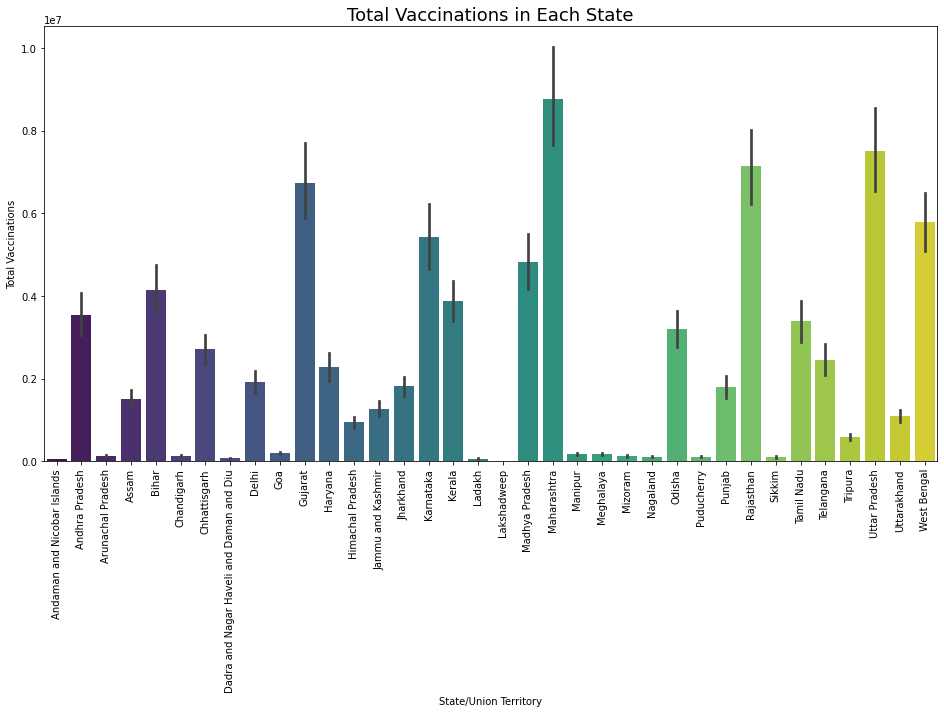

In [74]:
plt.figure(figsize=(16, 8))
sns.barplot(data=vaccine_state, x='State', y='Total', palette='viridis')
plt.title('Total Vaccinations in Each State', size=18)
plt.xlabel('State/Union Territory')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=90)
plt.show()


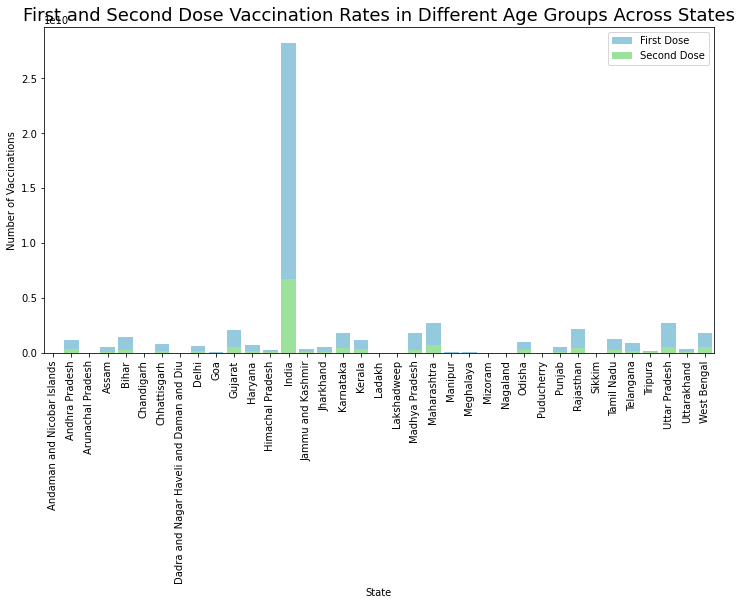

In [72]:
age_group_vaccine_first_dose = vaccine.groupby('State')['First Dose Administered'].sum().reset_index()
age_group_vaccine_second_dose = vaccine.groupby('State')['Second Dose Administered'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=age_group_vaccine_first_dose, x='State', y='First Dose Administered', color='skyblue', label='First Dose')
sns.barplot(data=age_group_vaccine_second_dose, x='State', y='Second Dose Administered', color='lightgreen', label='Second Dose')
plt.title('First and Second Dose Vaccination Rates in Different Age Groups Across States', size=18)
plt.xlabel('State')
plt.ylabel('Number of Vaccinations')
plt.xticks(rotation=90)
plt.legend()
plt.show()
